# <center> **CARD FRAUD DETECTION IN MACHINE LEARNING** </center>

<p align="center">
  <img src="https://dataaspirant.com/wp-content/uploads/2020/09/3-Credit-Card-Fraud-Detection.png" alt="Sublime's custom image"/>
</p>

## Abstract
...

## About the Dataset
The dataset contains approximately 6,362,620 transactions made through various forms of online payments. Among these, about 8,213 transactions are fraudulent, indicating that this is a highly imbalanced dataset.

This dataset includes the following fields:

-   **step**: represents a unit of time where 1 step equals 1 hour
-   **type**: type of online transaction
-   **amount**: the amount of the transaction
-   **nameOrig**: customer starting the transaction
-   **oldbalanceOrg**: balance before the transaction
-   **newbalanceOrig**: balance after the transaction
-   **nameDest**: recipient of the transaction
-   **oldbalanceDest**: initial balance of the recipient before the transaction
-   **newbalanceDest**: the new balance of the recipient after the transaction
-   **isFraud**: fraud transaction

Among these fields, we will only use the necessary data and exclude columns such as 'nameOrig', 'nameDest', and 'isFlaggedFraud' for our processing.


## Process
1. Importing Libraries & Loading Datasets.

2. Data Preprocessing & Preparing Datasets.

3. Exploratoty Data & Visualization.

4. Handling Imbalanced Datasets.

5. Conclusions.

6. Further Enhancements.

7. Acknowledgement and References.

## Step 1: Importing Libraries & Loading Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
dataset_main = pd.read_csv("Dataset/PS_20174392719_1491204439457_log.csv")

dataset_main.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## Step 2: Data exploration and Data preparation

In [3]:
if dataset_main.isna().any().any():
    print("Missing Values in Dataframe!")
else:
    print(dataset_main.isna().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [4]:
dataset_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
dataset_main.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Dropping the 'nameOrig', 'nameDest', and 'isFlaggedFraud'

In [6]:
dataset_main.drop('nameOrig', axis=1, inplace=True)
dataset_main.drop('nameDest', axis=1, inplace=True)
dataset_main.drop('isFlaggedFraud', axis=1, inplace=True)

In [7]:
dataset_main.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0


## Step 3: Exploratory Analyist & Visualization

In [9]:
dataset_main['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
# Đếm số lượng giao dịch trong mỗi lớp
class_count_df = pd.DataFrame(dataset_main['isFraud'].value_counts()).reset_index()
class_count_df.columns = ['Class', 'Counts']

class_count_df.value_counts()

Class  Counts 
0      6354407    1
1      8213       1
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_16068\1219225070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Class', y='Counts', data=class_count_df, palette=custom_palette)


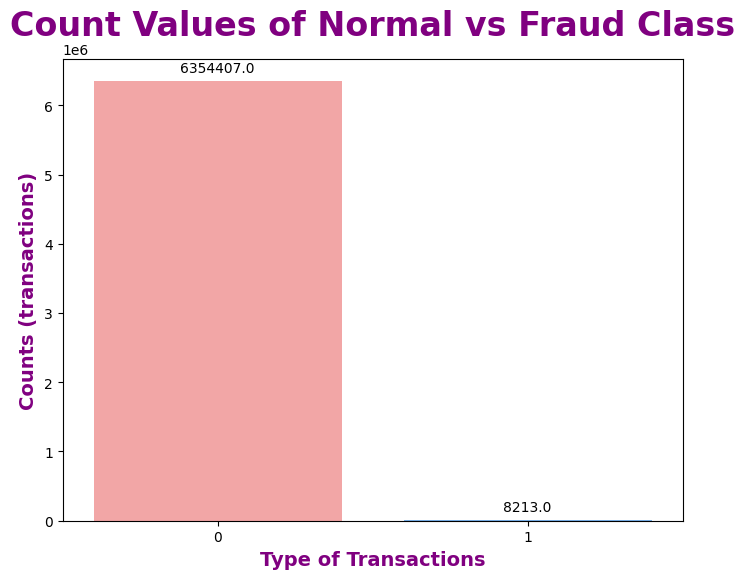

In [11]:
# Định nghĩa một bảng màu tùy chỉnh
custom_palette = ['#FF9999', '#66B2FF']

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Class', y='Counts', data=class_count_df, palette=custom_palette)
plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Counts (transactions)', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')

# Thêm số lượng lên trên các bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

## Amount of Transaction money and Transactions Time


In [8]:
legit = dataset_main[dataset_main['isFraud'] == 0]
fraud = dataset_main[dataset_main['isFraud'] == 1]

In [9]:
legit.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0
mean,2.432357e+02,1.781970e+05,8.328287e+05,8.559702e+05,1.101421e+06,1.224926e+06,0.0
std,1.421402e+02,5.962370e+05,2.887144e+06,2.924987e+06,3.399202e+06,3.673816e+06,0.0
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.560000e+02,1.336840e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.390000e+02,7.468472e+04,1.406900e+04,0.000000e+00,1.333118e+05,2.148817e+05,0.0
75%,3.340000e+02,2.083648e+05,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06,0.0
max,7.180000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0


In [10]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0


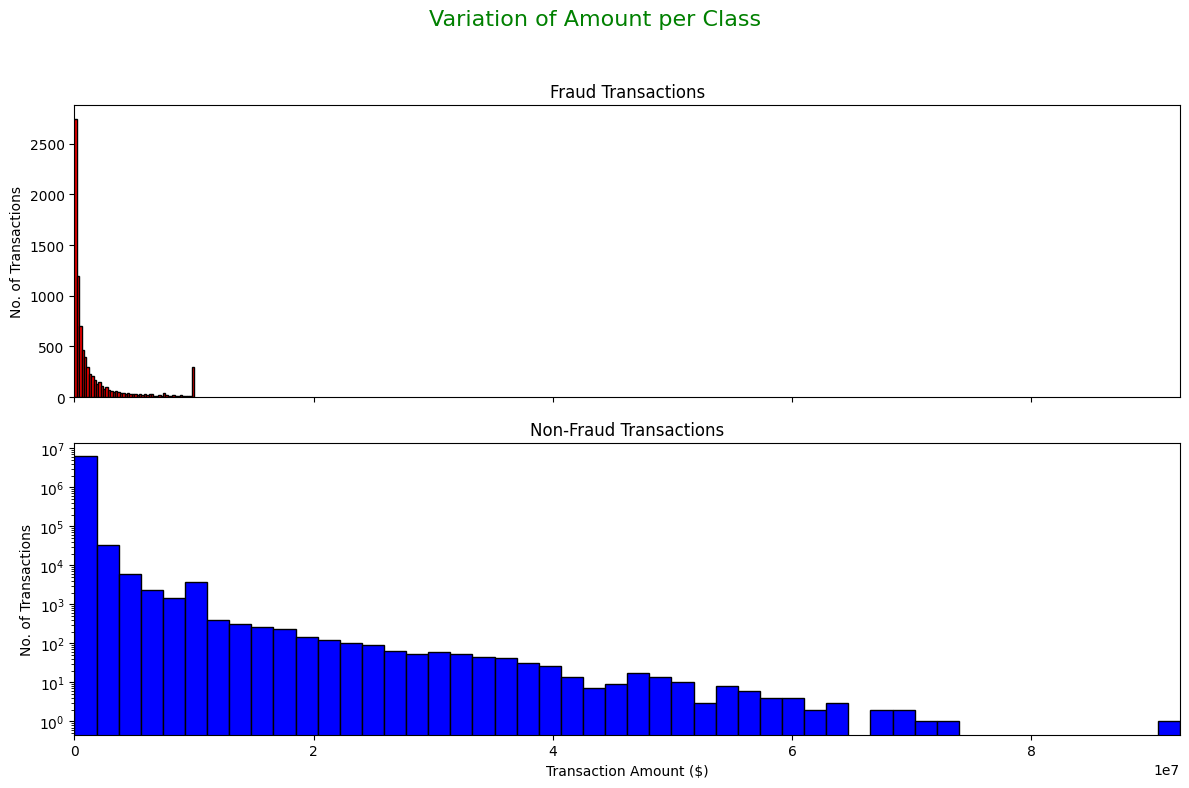

In [11]:
# Tạo subplots với 2 hàng và 1 cột, chia sẻ trục x
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.suptitle("Variation of Amount per Class", color='green', fontsize=16)
bins = 50  # Số lượng bins để có độ phân giải cao hơn

# Vẽ histogram cho các giao dịch gian lận
ax0.hist(fraud['amount'], bins=bins, color='red', edgecolor='black')
ax0.set_title('Fraud Transactions')
ax0.set_ylabel('No. of Transactions')

# Vẽ histogram cho các giao dịch không gian lận
ax1.hist(legit['amount'], bins=bins, color='blue', edgecolor='black')
ax1.set_title('Non-Fraud Transactions')
ax1.set_ylabel('No. of Transactions')

# Đặt giới hạn cho trục x
plt.xlim(0, 9.244552e+07)
plt.xlabel('Transaction Amount ($)')
plt.yscale('log')  # Sử dụng thang đo log cho trục y để dễ dàng so sánh

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Điều chỉnh bố cục để không chồng lên tiêu đề
plt.show()

In [12]:
fraud['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

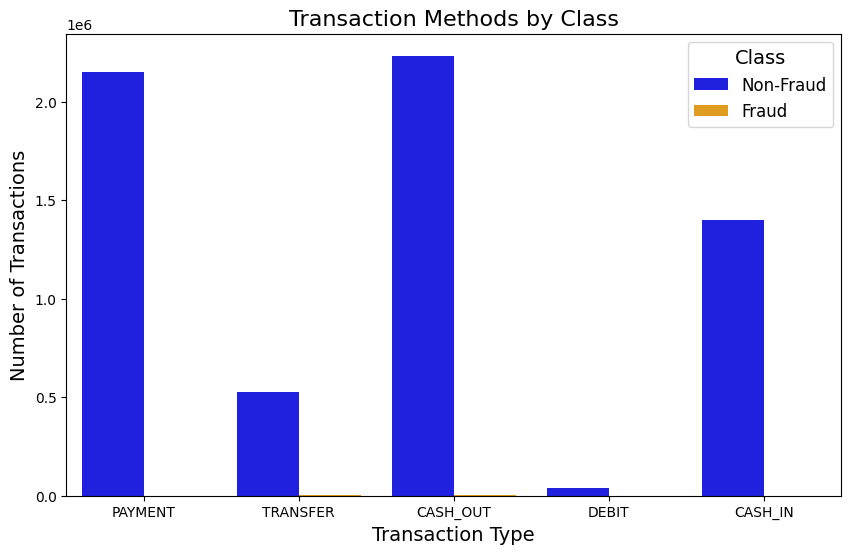

In [13]:
plt.figure(figsize=(10, 6))
plt.title("Transaction Methods by Class", fontsize=16)

# Sử dụng countplot để vẽ biểu đồ cho cả hai loại giao dịch
sns.countplot(x='type', hue='isFraud', data=dataset_main, palette={0: "blue", 1: "orange"})

# Đặt nhãn cho trục x và trục y
plt.xlabel("Transaction Type", fontsize=14)
plt.ylabel("Number of Transactions", fontsize=14)

# Hiển thị chú thích (legend)
plt.legend(title="Class", title_fontsize='14', fontsize='12', labels=['Non-Fraud', 'Fraud'])

# Hiển thị biểu đồ
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10384\2773253131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=dataset_main[dataset_main['isFraud'] == 0], ax=ax0, palette='Blues')
C:\Users\admin\AppData\Local\Temp\ipykernel_10384\2773253131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=dataset_main[dataset_main['isFraud'] == 1], ax=ax1, palette='Reds')


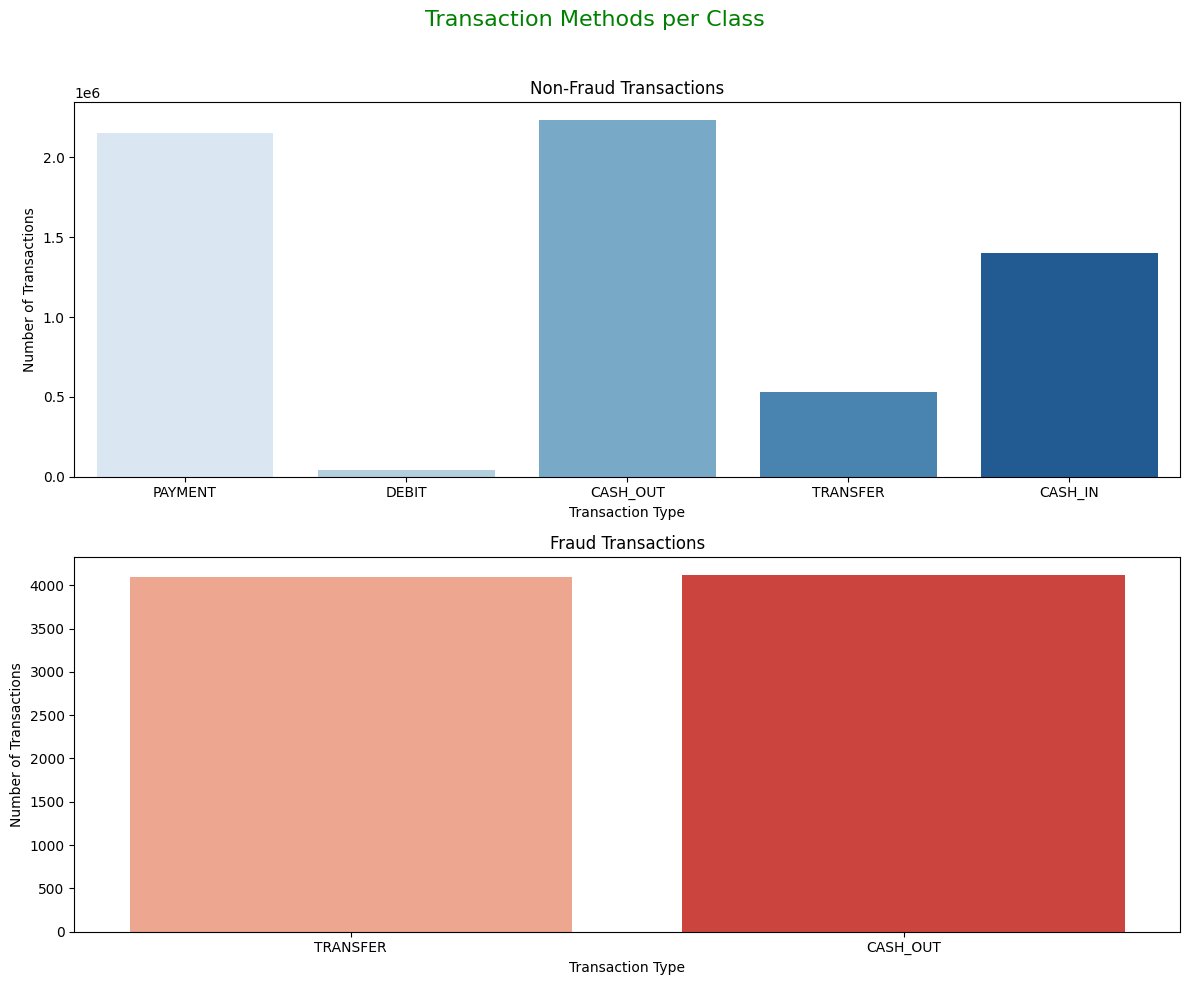

In [14]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
fig.suptitle("Transaction Methods per Class", fontsize=16, color='green')

# Vẽ biểu đồ đếm cho các giao dịch không gian lận
sns.countplot(x='type', data=dataset_main[dataset_main['isFraud'] == 0], ax=ax0, palette='Blues')
ax0.set_title('Non-Fraud Transactions')
ax0.set_xlabel('Transaction Type')
ax0.set_ylabel('Number of Transactions')

# Vẽ biểu đồ đếm cho các giao dịch gian lận
sns.countplot(x='type', data=dataset_main[dataset_main['isFraud'] == 1], ax=ax1, palette='Reds')
ax1.set_title('Fraud Transactions')
ax1.set_xlabel('Transaction Type')
ax1.set_ylabel('Number of Transactions')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Điều chỉnh bố cục để các thành phần không bị chồng lấn lên tiêu đề chính
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo và fit LabelEncoder
label_encoder = LabelEncoder()
dataset_main['type'] = label_encoder.fit_transform(dataset_main['type'])

# Hiển thị danh sách các phương thức và số tương ứng
print("Các phương thức giao dịch và số tương ứng:")
for method, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{method}: {code}")

Các phương thức giao dịch và số tương ứng:
CASH_IN: 0
CASH_OUT: 1
DEBIT: 2
PAYMENT: 3
TRANSFER: 4


In [16]:
dataset_main.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


## Step 4: Handeling Imbalanced Dataset

#### 1. Over Stampling - Random Over Stampler


In [35]:
dataset_main['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [37]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [47]:
X_rover = dataset_main.drop(columns=['isFraud'])
y_rover = dataset_main['isFraud']

In [48]:
ros = RandomOverSampler(random_state=42)
X_rover, y_rover = ros.fit_resample(X_rover, y_rover)

# Tạo dataset mới sau khi xử lý qua RandomOverSampler
dataset_RandomOverStampler = pd.DataFrame(X_rover, columns=dataset_main.drop(columns=['isFraud']).columns)
dataset_RandomOverStampler['isFraud'] = y_rover

In [51]:
print(dataset_RandomOverStampler['isFraud'].value_counts())

isFraud
0    6354407
1    6354407
Name: count, dtype: int64


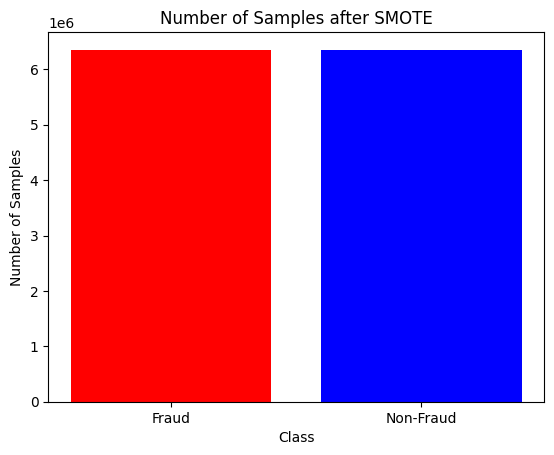

In [52]:
# Tính toán số lượng mẫu trong mỗi lớp
fraud_count = np.sum(y_rover == 1)
non_fraud_count = np.sum(y_rover == 0)

# Vẽ biểu đồ cột
plt.bar(['Fraud', 'Non-Fraud'], [fraud_count, non_fraud_count], color=['red', 'blue'])
plt.title('Number of Samples after SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Hiển thị biểu đồ
plt.show()

##### Using RandomForestClassifier to Evaluate F1 Score

1. For RandomOverStampler Dataset

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

In [54]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_rover, y_rover, test_size=0.2, random_state=42)

# Khởi tạo mô hình và huấn luyện
ROS_Model = RandomForestClassifier(random_state=42)
ROS_Model.fit(X_train_1, y_train_1)

RandomForestClassifier(random_state=42)

In [55]:
y_predROS = ROS_Model.predict(X_test_1)
f1 = f1_score(y_test_1, y_predROS)

print(f"F1 Score: {f1}")

print("Classification Report:")
print(classification_report(y_test_1, y_predROS))

F1 Score: 0.9999760023258074
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



2. For Imbalaced Dataset

In [56]:
dataset_main['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [19]:
X = dataset_main.drop(columns=['isFraud'])
y = dataset_main['isFraud']

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình và huấn luyện
ROS_Model = RandomForestClassifier(random_state=42)
ROS_Model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred = ROS_Model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

F1 Score: 0.8804902962206334
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



##### Using SVM to Evaluate F1 Score

1. For Imbalanced Dataset

In [18]:
X = dataset_main.drop(columns=['isFraud'])
y = dataset_main['isFraud']
print( y)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


In [21]:
from sklearn.svm import SVC

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVC_Model = SVC(random_state=42)
SVC_Model.fit(X=X_train, y = y_train)

In [ ]:
# Dự đoán với mô hình SVM
y_predSVM = SVM_Model.predict(X_test)

# Tính toán F1 Score
f1_svm = f1_score(y_test, y_predSVM)
print(f"F1 Score for SVM: {f1_svm}")

# In báo cáo phân loại
print("Classification Report for SVM:")
print(classification_report(y_test_1, y_predSVM))

2. For RandomOverStampler Dataset

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_rover, y_rover, test_size=0.2, random_state=42)

SVC_Model_ROS = SVC(random_state=42)
SVC_Model_ROS.fit(X=X_train_1, y = y_train_1)

In [ ]:
# Dự đoán với mô hình SVM
y_predSVM = SVC_Model_ROS.predict(X_test_1)

# Tính toán F1 Score
f1_svm = f1_score(y_test_1, y_predSVM)
print(f"F1 Score for SVM: {f1_svm}")

# In báo cáo phân loại
print("Classification Report for SVM:")
print(classification_report(y_test_1, y_predSVM))

#### 2. SMOTE + ENN
##### SMOTE (Synthetic Minority Over-sampling Technique)
 - SMOTE is an oversampling technique designed to address the issue of imbalanced data by creating synthetic samples from the minority class. SMOTE works as follows:

    1. Select Minority Samples: For each sample in the minority class, SMOTE selects a specified number of nearest neighbors.
    2. Generate Synthetic Samples: SMOTE generates new data points by interpolating between the selected sample and its nearest neighbors. These new data points are added to the minority class to balance the data.
##### ENN (Edited Nearest Neighbors)
- Edited Nearest Neighbors (ENN) is an undersampling method aimed at removing noise from the majority class. ENN works as follows:
  1. Select k Nearest Neighbors: For each data sample, ENN considers its k nearest neighbors.
  2. Remove Noisy Samples: If the label of a sample does not match the label of the majority of its k nearest neighbors, that sample is removed.

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.datasets import make_classification
from collections import Counter

In [23]:
X = dataset_main.drop(columns=['isFraud'])
y = dataset_main['isFraud']

In [24]:
## Apply Smoke to handeling imbalaced data
sm_df = SMOTE(random_state=42)
X_resampled, y_resampled = sm_df.fit_resample(X=X, y=y)

In [25]:
counter = Counter(y_resampled)
print("After Counter: ", counter)

After Counter:  Counter({0: 6354407, 1: 6354407})


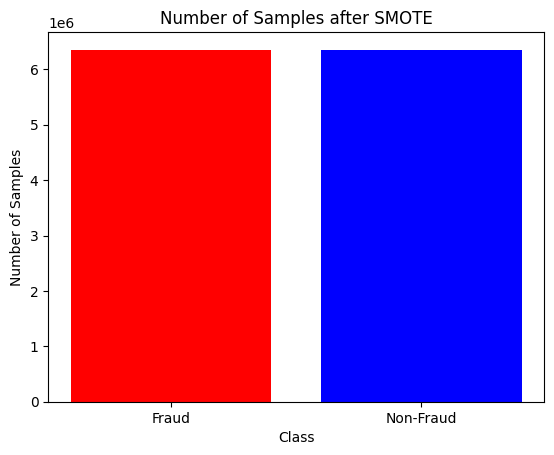

In [26]:
# Tính toán số lượng mẫu trong mỗi lớp
fraud_count = np.sum(y_resampled == 1)
non_fraud_count = np.sum(y_resampled == 0)

# Vẽ biểu đồ cột
plt.bar(['Fraud', 'Non-Fraud'], [fraud_count, non_fraud_count], color=['red', 'blue'])
plt.title('Number of Samples after SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Hiển thị biểu đồ
plt.show()

In [27]:
# Sử dụng ENN để loại bỏ mẫu nhiễu từ lớp đa số
enn = EditedNearestNeighbours(n_neighbors=3)
X_resampled_enn, y_resampled_enn = enn.fit_resample(X_resampled, y_resampled)

print("Sau khi lấy mẫu với ENN:", Counter(y_resampled))

Sau khi lấy mẫu với ENN: Counter({0: 6354407, 1: 6354407})


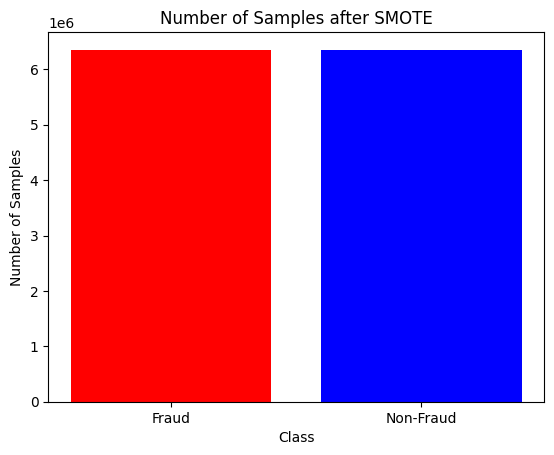

In [28]:
# Tính toán số lượng mẫu trong mỗi lớp
fraud_count = np.sum(y_resampled_enn == 1)
non_fraud_count = np.sum(y_resampled_enn == 0)

# Vẽ biểu đồ cột
plt.bar(['Fraud', 'Non-Fraud'], [fraud_count, non_fraud_count], color=['red', 'blue'])
plt.title('Number of Samples after SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Hiển thị biểu đồ
plt.show()

#### 2. SMOTE + Tomek
##### SMOTE (Synthetic Minority Over-sampling Technique)
 - SMOTE is an oversampling technique designed to address the issue of imbalanced data by creating synthetic samples from the minority class. SMOTE works as follows:

    1. Select Minority Samples: For each sample in the minority class, SMOTE selects a specified number of nearest neighbors.
    2. Generate Synthetic Samples: SMOTE generates new data points by interpolating between the selected sample and its nearest neighbors. These new data points are added to the minority class to balance the data.
##### Tomek 
 - Tomek Links is an under-sampling technique used to clean data by removing noisy samples, especially those from the majority class that are near the decision boundary. This helps to create a clearer decision boundary.
    1. Identify Tomek Links pairs: A pair (x, y) is called a Tomek Link if x and y are each other's nearest neighbors but belong to different classes.
    2. Remove samples: If a sample belongs to the minority class, keep it; if it belongs to the majority class, remove it.


In [29]:
from imblearn.under_sampling import TomekLinks

In [30]:
sm = SMOTE(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [31]:
counter = Counter(y_resampled)
print("After SMOTE: ", counter)

After SMOTE:  Counter({0: 6354407, 1: 6354407})


In [32]:
# Bước 2: Áp dụng TOMEK Links
tomek = TomekLinks()
X_resampled_tomek, y_resampled_tomek = tomek.fit_resample(X_resampled, y_resampled)

In [33]:
print("After Tomek: ", Counter(y_resampled_tomek))

After Tomek:  Counter({0: 6354407, 1: 6353835})


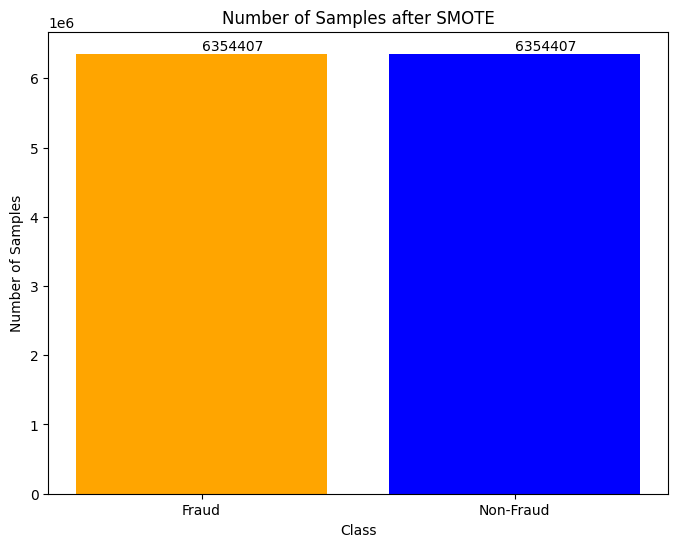

In [34]:
fraud_count = np.sum(y_resampled == 1)
non_fraud_count = np.sum(y_resampled == 0)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
bars = plt.bar(['Fraud', 'Non-Fraud'], [fraud_count, non_fraud_count], color=['orange', 'blue'])

# Thêm giá trị lên đầu mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.title('Number of Samples after SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Hiển thị biểu đồ
plt.show()